In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as miss

from matplotlib import pyplot as plt

### import dataset

In [3]:
train_data = pd.read_csv('../../data/train.csv', index_col='id')
train_data.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


#### sanity check

In [4]:
print(f'rows:{train_data.shape[0]}, columns:{train_data.shape[1]}')

rows:300000, columns:25


In [5]:
train_data.isna().sum()

cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
target    0
dtype: int64

<Figure size 3600x1800 with 0 Axes>

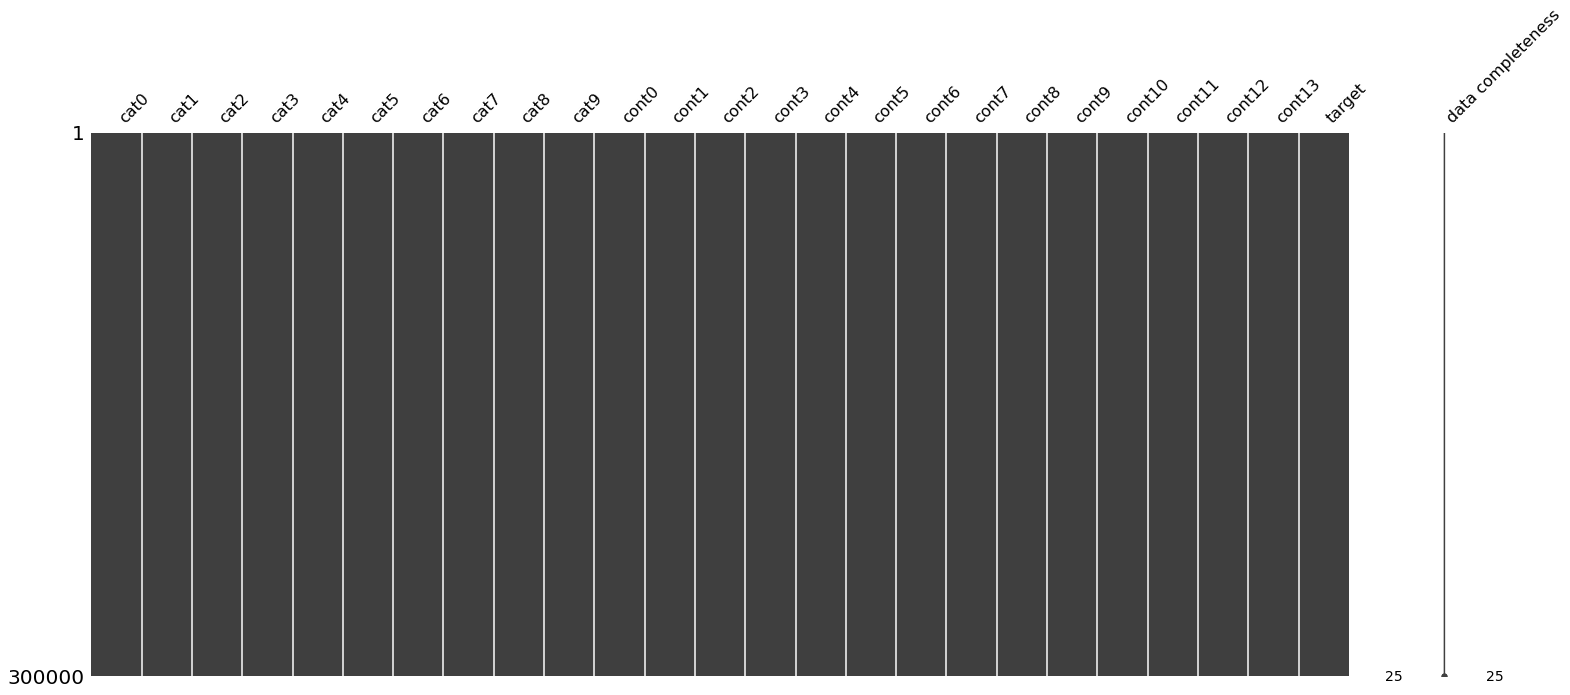

In [8]:
plt.figure(figsize=[12, 6], dpi=300)
miss.matrix(train_data, labels=train_data.columns.tolist())
plt.savefig('../../graphs/examine/missing_values.png')
plt.show()

In [14]:
print(f'categorical features: {train_data.select_dtypes(include=object).columns.tolist()}\n'
      f'numerical features: {train_data.select_dtypes(include=np.number).columns.tolist()}\n'
      f'num. categorical features: {len(train_data.select_dtypes(include=object).columns)}\n'
      f'num. numerical features: {len(train_data.select_dtypes(include=np.number).columns)}')

categorical features: ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
numerical features: ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'target']
num. categorical features: 10
num. numerical features: 15


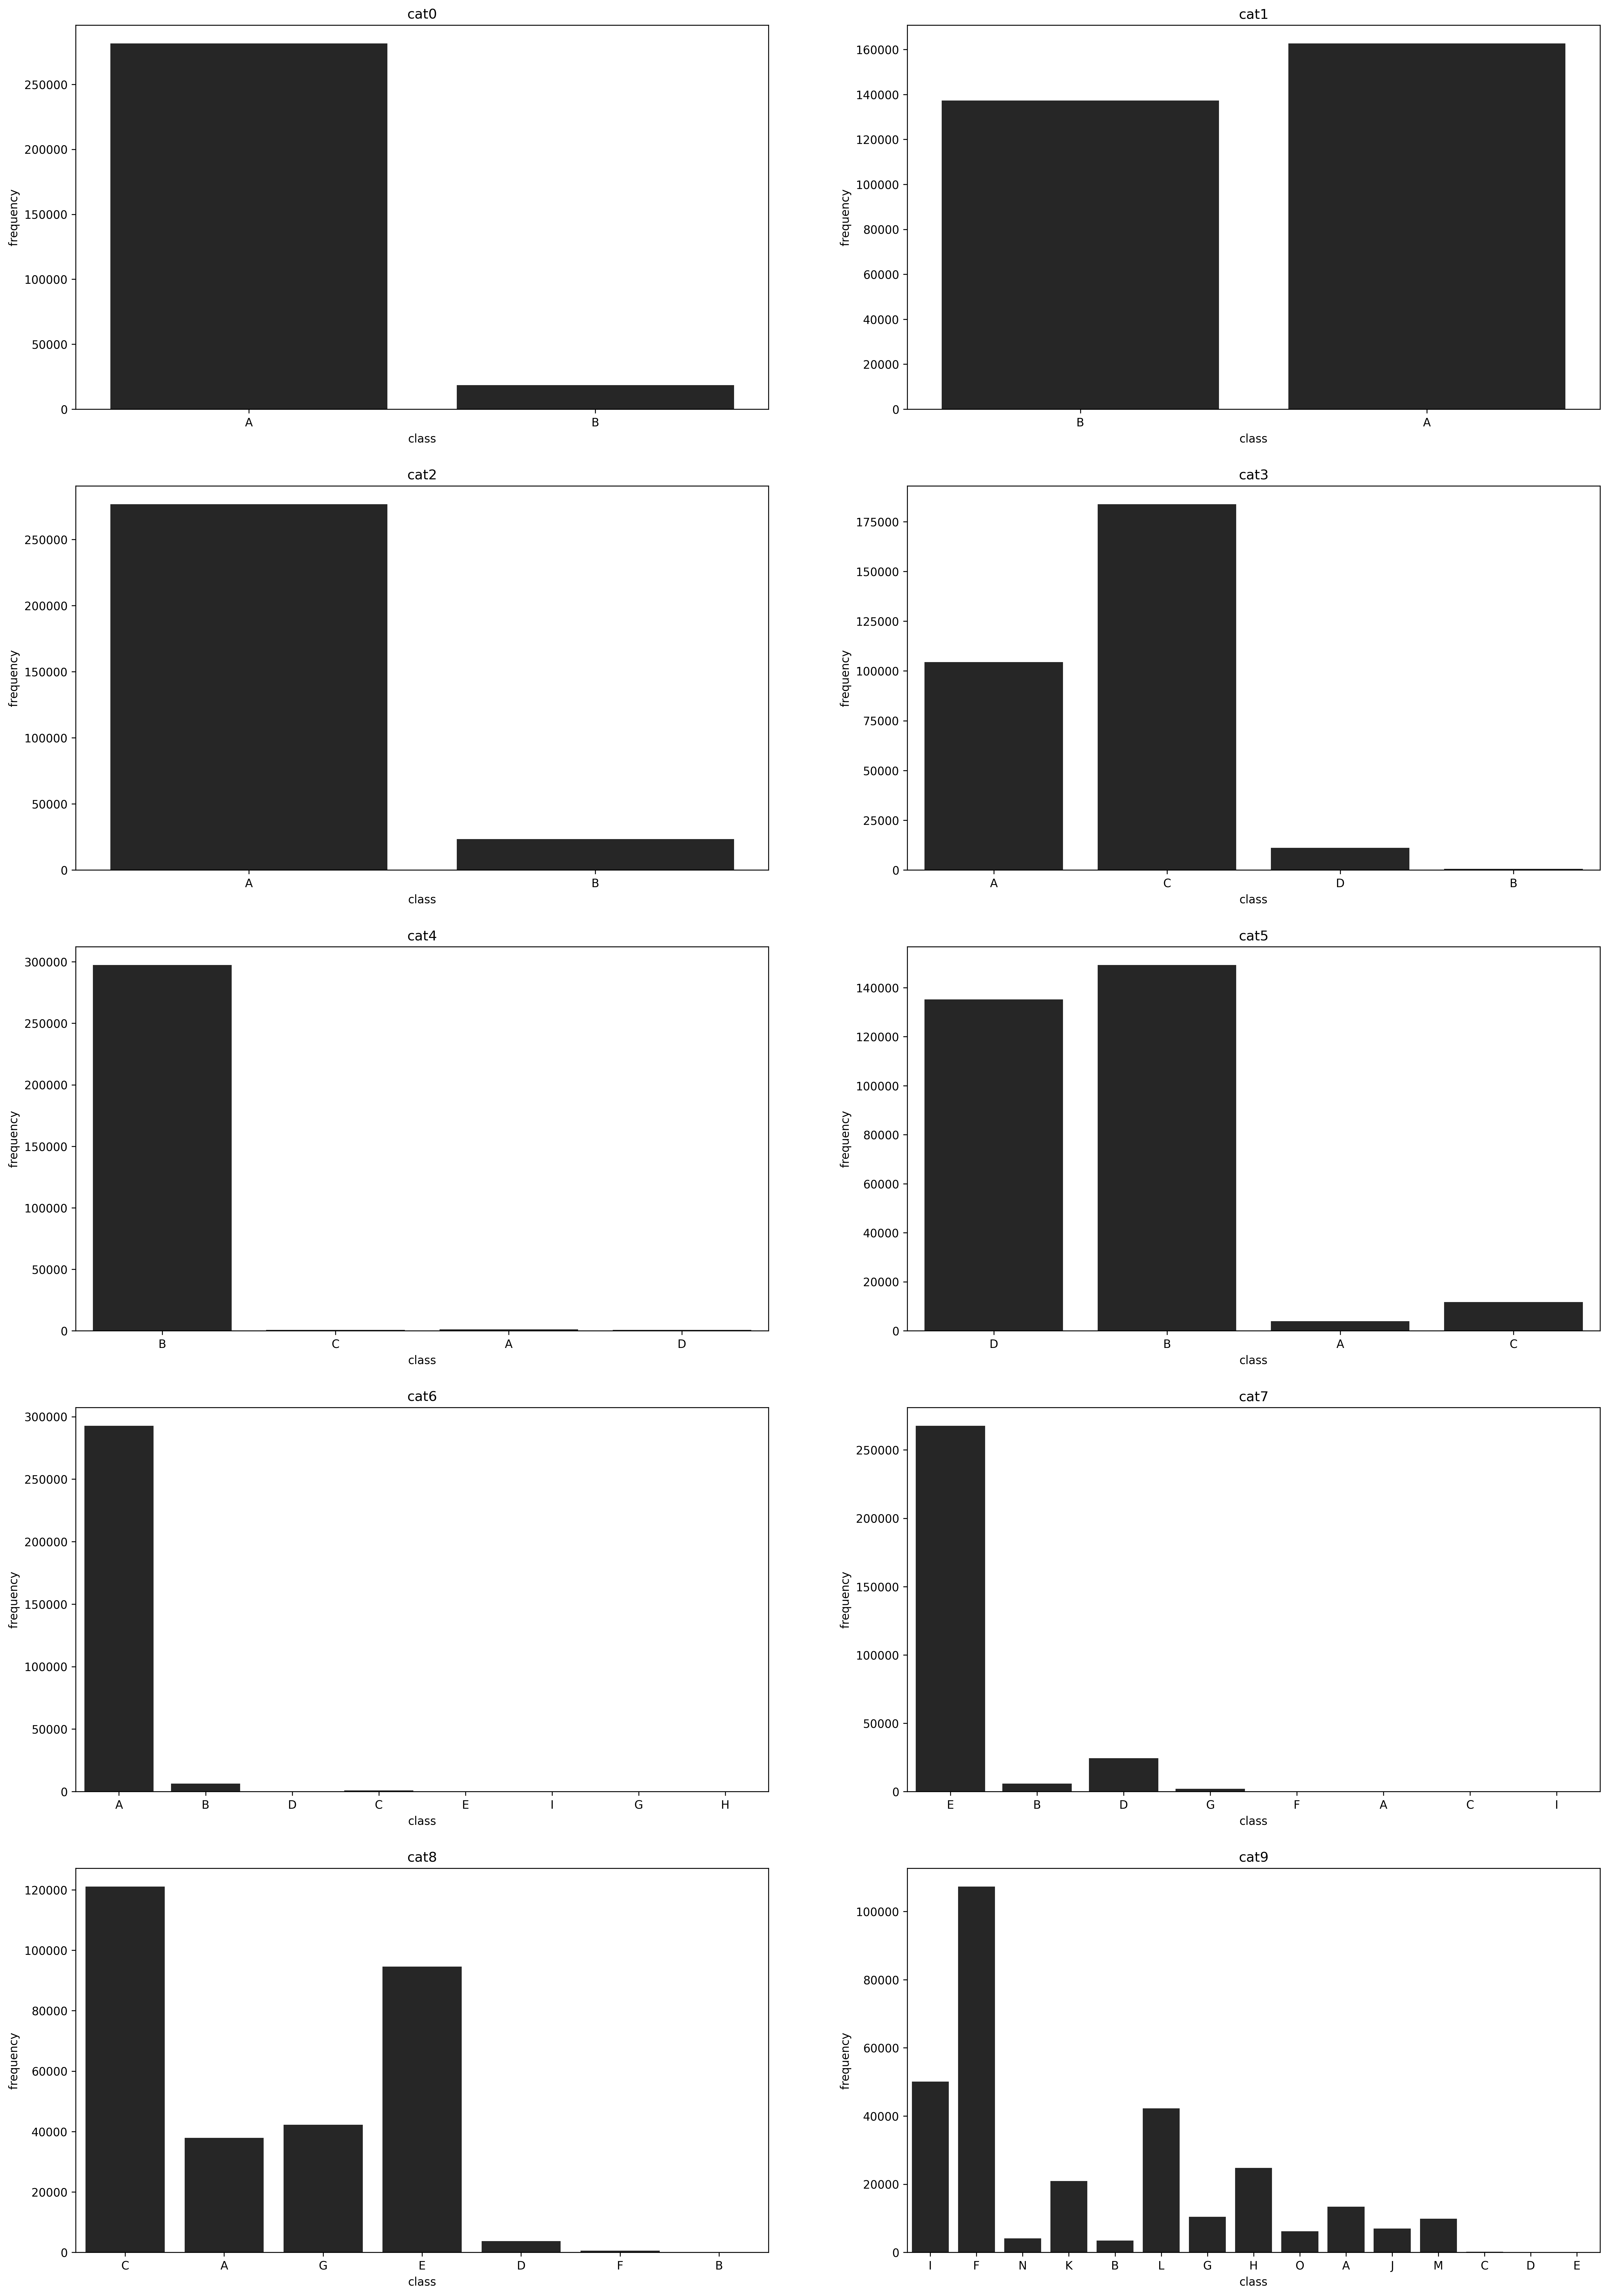

In [21]:
cat_columns = train_data.select_dtypes(include=object).columns
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=[24, 36], dpi=300)
axes = axes.ravel()

for ax in range(len(axes)):
    sns.countplot(x=train_data[cat_columns[ax]],
                  ax=axes[ax],
                  color='#262626')
    axes[ax].set_title(f'{cat_columns[ax]}')
    axes[ax].set_xlabel('class')
    axes[ax].set_ylabel('frequency')

plt.savefig('../../graphs/examine/classes_in_categorical_features.png')
plt.show()
